In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_style('whitegrid')

In [3]:
import pandas as pd
fashion_Test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fashion-mnist_test.csv',sep=',')
fashion_Train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fashion-mnist_train.csv',sep=',')

In [4]:
fashion_Train_df.shape

(60000, 785)

In [5]:
fashion_Test_df.shape

(10000, 785)

In [6]:
train = np.array(fashion_Train_df,dtype='float32')
test = np.array(fashion_Test_df,dtype='float32')

In [7]:
#Specifying class labels
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Sneaker')

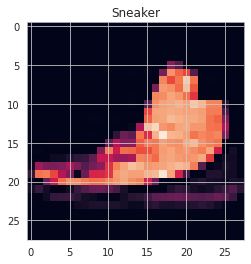

In [8]:
 i = random.randint(1,60000)
 plt.imshow(train[i,1:].reshape((28,28)))
 label_index = fashion_Train_df["label"][i]
 plt.title(f"{class_names[label_index]}")

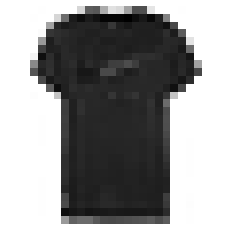

In [9]:
plt.imshow(train[10,1:].reshape((28,28)),cmap='binary')
plt.axis('off')
plt.show()

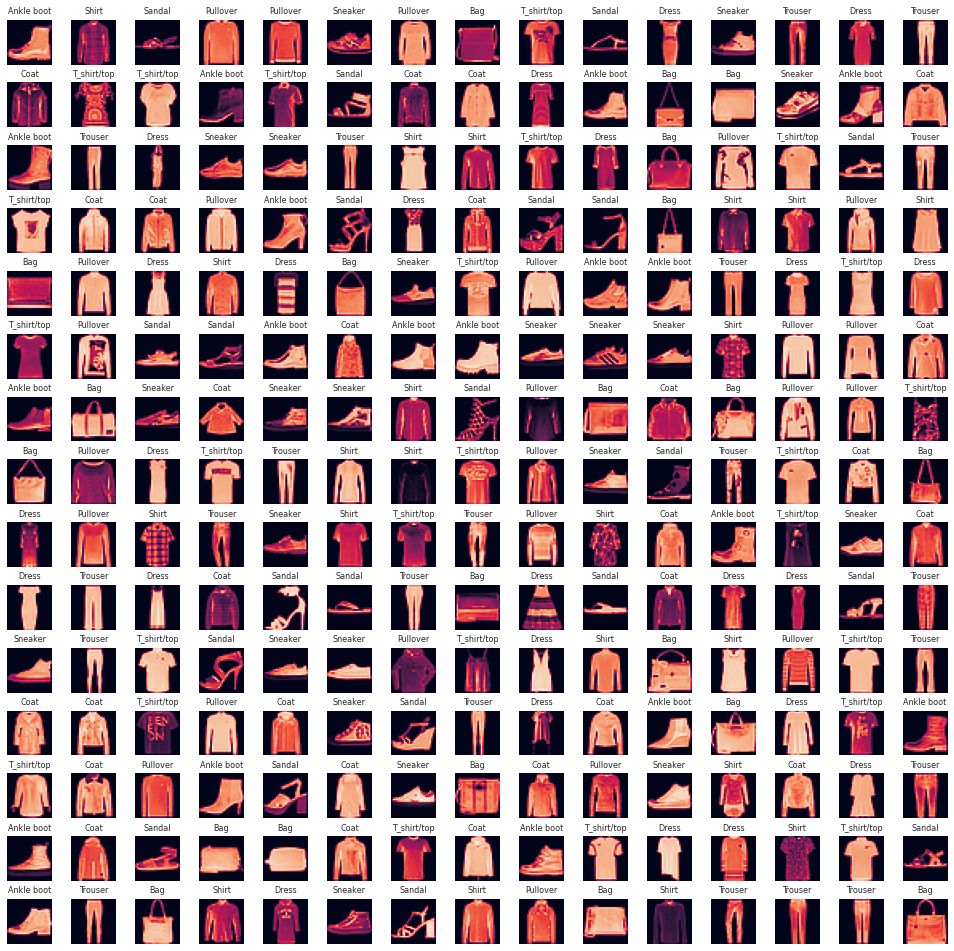

In [10]:
w_grid = 15
l_grid = 15
fig,axes = plt.subplots(l_grid,w_grid,figsize=(17,17))
axes = axes.ravel()
n_train = len(train)
for i in np.arange(0,w_grid * l_grid):
  index = np.random.randint(0,n_train)
  axes[i].imshow(train[index,1:].reshape((28,28)))
  label_index = int(train[index,0])
  axes[i].set_title(class_names[label_index],fontsize=8)
  axes[i].axis("off")
plt.subplots_adjust(hspace=0.4)

In [11]:
#Prepare Training and testing set

x_train = train[:,1:] /255
y_train = train[:,0]

x_test = test[:,1:] / 255
y_test = test[:,0]

In [12]:
x_train.shape

(60000, 784)

In [13]:
y_train.shape

(60000,)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size=0.2,random_state=234)

In [15]:
x_train.shape

(48000, 784)

In [16]:
x_validate.shape

(12000, 784)

In [17]:
y_train.shape

(48000,)

In [18]:
y_validate.shape

(12000,)

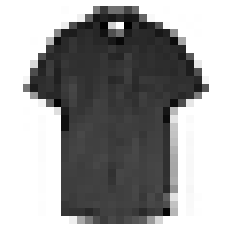

In [24]:
plt.imshow(x_train[2].reshape((28,28)),cmap='binary')
plt.axis('off')
plt.show()

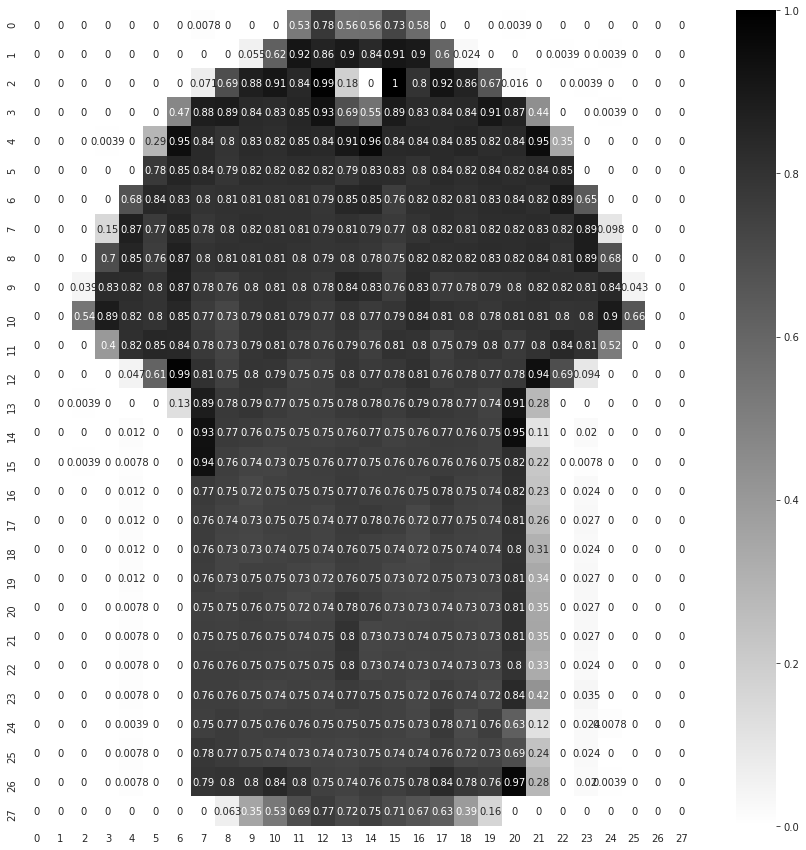

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[2].reshape((28,28)),annot=True,cmap='binary')

In [32]:
import tensorflow as tf

In [36]:
layers = [tf.keras.layers.Flatten(input_shape=[28,28],name='inputlayer'),
          tf.keras.layers.Dense(300,activation='relu',name='hiddenlayer1'),
          tf.keras.layers.Dense(100,activation='relu',name='hiddenlayer2'),
          tf.keras.layers.Dense(100,activation='relu',name='hiddenlayer3'),
          tf.keras.layers.Dense(10,activation='softmax',name='outputlayer')]
                                   
                                   

In [37]:
model_cf = tf.keras.models.Sequential(layers)

In [38]:
model_cf.layers

In [39]:
model_cf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputlayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenlayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
hiddenlayer3 (Dense)         (None, 100)               10100     
_________________________________________________________________
outputlayer (Dense)          (None, 10)                1010      
Total params: 276,710
Trainable params: 276,710
Non-trainable params: 0
_________________________________________________________________


In [43]:
hiddenlayer1 = model_cf.layers[1]
hiddenlayer1

In [44]:
hiddenlayer1.get_weights()

[array([[-0.01645569, -0.00515721,  0.01224431, ..., -0.05144675,
         -0.02752871, -0.04988051],
        [ 0.07070519, -0.01971493,  0.0385403 , ...,  0.00953555,
         -0.04168326,  0.00353984],
        [ 0.07425669,  0.05510885,  0.05157442, ...,  0.0690062 ,
          0.03121648, -0.02881314],
        ...,
        [ 0.02212462,  0.02875257, -0.01641092, ..., -0.04125963,
          0.03982125, -0.06797417],
        [ 0.00214511,  0.05393815, -0.00268324, ...,  0.03095784,
         -0.00862534,  0.02490077],
        [ 0.03944971,  0.05020817, -0.01724418, ..., -0.06547331,
          0.01527385, -0.01474257]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [45]:
weights,bias = hiddenlayer1.get_weights()

In [46]:
weights.shape

(784, 300)

In [47]:
bias.shape

(300,)

In [49]:
loss_function = 'sparse_categorical_crossentropy'
optimizer = 'SGD'
metrics = ['accuracy']
model_cf.compile(loss=loss_function,optimizer=optimizer,metrics=metrics)

In [51]:
Epoches = 30
validation_set = (x_validate,y_validate)
history = model_cf.fit(x_train,y_train, epochs = Epoches,validation_data= validation_set,batch_size=32) 

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7925 - accuracy: 0.7357 - val_loss: 0.5252 - val_accuracy: 0.8167
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4973 - accuracy: 0.8263 - val_loss: 0.4881 - val_accuracy: 0.8183
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4469 - accuracy: 0.8418 - val_loss: 0.4417 - val_accuracy: 0.8405
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4162 - accuracy: 0.8521 - val_loss: 0.4054 - val_accuracy: 0.8531
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3951 - accuracy: 0.8598 - val_loss: 0.4403 - val_accuracy: 0.8422
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3763 - accuracy: 0.8660 - val_loss: 0.3865 - val_accuracy: 0.8620
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3630 - accuracy: 0.8717 - val_loss: 0.3935 - val_accuracy:

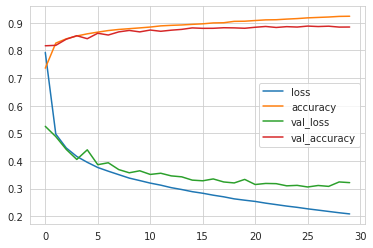

In [52]:
pd.DataFrame(history.history).plot()

In [53]:
model_cf.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3177 - accuracy: 0.8877


[0.3177226185798645, 0.8877000212669373]

In [54]:
x_new = x_test[:3]
y_pred = model_cf.predict(x_new)
y_pred

array([[9.4253957e-01, 6.1409639e-07, 7.0788286e-04, 2.5617410e-04,
        9.0545334e-05, 1.1985273e-07, 5.6352179e-02, 1.5655881e-07,
        5.2609572e-05, 8.1729496e-08],
       [1.4308961e-06, 9.9999797e-01, 2.0907597e-08, 5.6648361e-07,
        2.6912174e-08, 2.8647504e-10, 7.1418882e-10, 3.8979180e-12,
        5.1778959e-09, 9.9757791e-10],
       [2.7614811e-02, 8.6992123e-04, 8.2940859e-01, 1.5445170e-03,
        4.0434692e-03, 1.8460589e-04, 1.3501906e-01, 1.9864623e-04,
        2.7360473e-04, 8.4268034e-04]], dtype=float32)

In [55]:
y_pred = np.argmax(y_pred,axis=-1)

In [56]:
y_pred

array([0, 1, 2])

In [57]:
y_new = y_test[:3]
y_new

array([0., 1., 2.], dtype=float32)

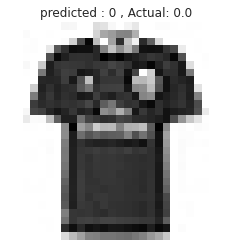

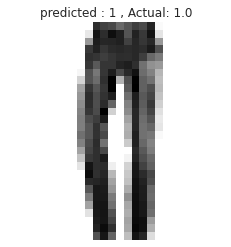

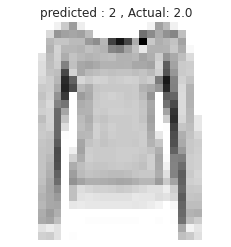

In [59]:
for data,pred,actual in zip(x_new,y_pred,y_new):
  plt.imshow(data.reshape(28,28),cmap='binary')
  plt.title(f"predicted : {pred} , Actual: {actual}")
  plt.axis("off")
  plt.show()